**Assignment 2B**\
**Jule Valendo Halim -1425567**\
**4/24/2024**

# Question 1

c:\Users\julev\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Number of Entries: 54017
Number of Unique Doctors: 19097 

Distribution of Ratings:
 rating
 1    38847
-1    15170
Name: count, dtype: int64


<Axes: title={'center': 'Distribution Graph of Ratings'}, xlabel='Count', ylabel='Rating'>

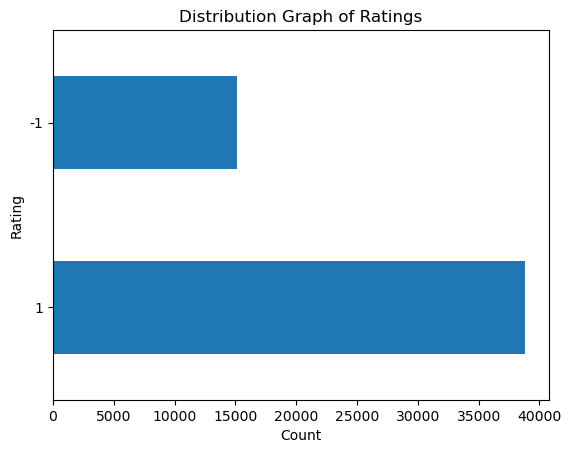

In [1]:
##Question 1

##loading in the dr_review

import pandas as pd

path='./DR_REVIEW/ratemd-dr-ratings.csv'
drReview=pd.read_csv(path)

print('Number of Entries:',drReview.shape[0])
print('Number of Unique Doctors:',drReview['dr-id-adjusted'].nunique(),'\n')

ratings=drReview['rating'].value_counts()
print("Distribution of Ratings:\n",ratings)

ratings.plot(kind='barh',title='Distribution Graph of Ratings', xlabel='Count',ylabel='Rating')

# Question 2

In [2]:
## Question 2

import nltk
import string
from tqdm.notebook import tqdm

stopWords=set(nltk.corpus.stopwords.words('english'))
punctuations=string.punctuation

def preprocess(text):
    tokens=nltk.word_tokenize(text.lower())
    tokensClean=[t for t in tokens if (t not in stopWords) and (t not in punctuations)]
    return ' '.join(tokensClean)

tqdm.pandas()
drReview['review-text-cleaned']=drReview['review-text-cleaned'].progress_apply(preprocess)

  0%|          | 0/54017 [00:00<?, ?it/s]

In [3]:
## Question 2 Continued
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

## Obtaining top 10 words (after tokenization and preprocessing)
stringOfReviews=' '.join(drReview['review-text-cleaned'])
words=stringOfReviews.split()
wordsFrequency=Counter(words)
sortedWords=sorted(wordsFrequency.items(),key=lambda x: x[1], reverse=True)

def topWords(inputWords):
    print('TOP 10 WORDS IN REVIEW TEXT:')
    for i in range (9):
        print('WORD:',inputWords[i][0],'//FREQUENCY:',inputWords[i][1])

topWords(sortedWords)

TFIDFVector=TfidfVectorizer()
tfidf=TFIDFVector.fit_transform([stringOfReviews])
features=TFIDFVector.get_feature_names_out()
scores=tfidf.toarray()[0]
zippedFeatures=list(zip(features,scores))
sortedFeatures=sorted(zippedFeatures, key=lambda x: x[1], reverse=True)
print('\n')
def topTFIDF(inputFeature):
    print('TOP 10 TFIDF SCORES:')
    for i in range (9):
        print('WORD:',inputFeature[i][0],'//TFIDF SCORE:',inputFeature[i][1])

topTFIDF(sortedFeatures)


TOP 10 WORDS IN REVIEW TEXT:
WORD: dr. //FREQUENCY: 31290
WORD: doctor //FREQUENCY: 24217
WORD: time //FREQUENCY: 15234
WORD: n't //FREQUENCY: 14816
WORD: would //FREQUENCY: 13848
WORD: staff //FREQUENCY: 12321
WORD: 's //FREQUENCY: 11607
WORD: office //FREQUENCY: 10256
WORD: great //FREQUENCY: 9796


TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.5525698179589782
WORD: doctor //TFIDF SCORE: 0.3251472052470261
WORD: time //TFIDF SCORE: 0.20448400010088189
WORD: would //TFIDF SCORE: 0.18426511888672864
WORD: staff //TFIDF SCORE: 0.16469631981135066
WORD: office //TFIDF SCORE: 0.13749900584218128
WORD: great //TFIDF SCORE: 0.13074611178837287
WORD: quot //TFIDF SCORE: 0.12111428254855972
WORD: recommend //TFIDF SCORE: 0.10845758131607795


# Question 3

In [4]:
## Question 3

from sklearn.cluster import KMeans

TFIDFVector=TfidfVectorizer()
first10KRows=drReview[0:10000]
first10KReviews=first10KRows['review-text-cleaned']
tfidf=TFIDFVector.fit_transform(first10KReviews)
features=TFIDFVector.get_feature_names_out()

def kMeansFunc(clusterCount):
    km=KMeans(n_clusters=clusterCount,n_init='auto').fit(tfidf)
    top10Words=km.cluster_centers_.argsort()[:,-10:]
    print(f'With {clusterCount} Clusters:')
    print(features[top10Words])
    return km

kMeans2=kMeansFunc(2)
kMeans3=kMeansFunc(3)
kMeans5=kMeansFunc(5)
kMeans10=kMeansFunc(10)

With 2 Clusters:
[['best' 'good' 'time' 'recommend' 'caring' 'staff' 'knowledgeable'
  'great' 'doctor' 'dr']
 ['get' 'see' 'staff' 'would' 'never' 'time' 'office' 'doctor' 'dr'
  'quot']]
With 3 Clusters:
[['wonderful' 'recommend' 'dr' 'staff' 'excellent' 'time' 'caring'
  'knowledgeable' 'great' 'doctor']
 ['care' 'would' 'always' 'patient' 'doctor' 'years' 'staff' 'good'
  'best' 'dr']
 ['staff' 'get' 'see' 'would' 'never' 'time' 'dr' 'office' 'doctor'
  'quot']]
With 5 Clusters:
[['like' 'care' 'patient' 'one' 'would' 'surgery' 'best' 'good' 'doctor'
  'dr']
 ['see' 'never' 'office' 'time' 'told' 'said' 'would' 'doctor' 'dr'
  'quot']
 ['wonderful' 'caring' 'helpful' 'knowledgeable' 'manner' 'bedside'
  'staff' 'dr' 'doctor' 'great']
 ['anyone' 'wonderful' 'highly' 'knowledgeable' 'dr' 'would' 'caring'
  'excellent' 'doctor' 'recommend']
 ['patients' 'questions' 'wait' 'always' 'takes' 'doctor' 'dr' 'staff'
  'office' 'time']]
With 10 Clusters:
[['expired' 'dr' 'years' 'knowledgeab

**Response to Question 3**

One problem caused by high dimensionality is the curse of dimensionality, which is that as the dimensions increase, the distances become more difficult to measure significant differences. This problem could be alleviated by using dimensionality reduction techniques such as principal component analysis (PCA).

Another problem is difficulty of interpretability and initial clustering selection. For example, in the KNN performed above, some of the clusters are difficult to interpret. KNN approaches can usually select random number of clusters to create before iteratively repeating the process to further create interpretable clusters. However, when there is a high dimensionality vector as the feature space, this may sometimes be difficult as the data might not have good separability, and so is very sensitive to changes in cluster counts. This problem could be addressed by testing out multiple clusters multiple times each. However, this would require some domain knowledge to ensure that the clusters make sense and has substantial topic divisions (ie., that each cluster meaningfully identifies some commonality or topic).

# Question 4

In [5]:
## Question 4

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim import corpora, models


texts=list(first10KRows['review-text-cleaned'])
tokenizedTexts=[text.split() for text in texts]
dictionary=corpora.Dictionary(tokenizedTexts)
dictionary.filter_extremes(no_below=5,no_above=0.8)

bowCorpus=[dictionary.doc2bow(text) for text in tokenizedTexts]

##modelling for 5 topics

print('5 Topics Modelled:')
lda = models.LdaModel(bowCorpus, num_topics=5, 
                    id2word=dictionary, 
                    update_every=5, 
                    chunksize=1000, 
                    passes=15)
lda.show_topics()


c:\Users\julev\anaconda3\Lib\site-packages\botocore\utils.py:15: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  import cgi
c:\Users\julev\anaconda3\Lib\site-packages\botocore\httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


5 Topics Modelled:


[(0,
  '0.050*"staff" + 0.037*"office" + 0.029*"dr." + 0.014*"friendly" + 0.014*"helpful" + 0.013*"great" + 0.012*"doctor" + 0.012*"always" + 0.011*"knowledgeable" + 0.011*"time"'),
 (1,
  '0.023*"dr." + 0.015*"surgery" + 0.011*"years" + 0.011*"n\'t" + 0.011*"doctor" + 0.009*"pain" + 0.008*"time" + 0.008*"one" + 0.008*"dr" + 0.007*"would"'),
 (2,
  '0.022*"quot" + 0.017*"n\'t" + 0.014*"doctor" + 0.010*"would" + 0.010*"told" + 0.008*"said" + 0.008*"dr." + 0.007*"back" + 0.007*"never" + 0.007*"get"'),
 (3,
  '0.019*"\'s" + 0.018*"dr." + 0.015*"time" + 0.015*"doctor" + 0.015*"like" + 0.014*"n\'t" + 0.012*"great" + 0.011*"see" + 0.011*"always" + 0.009*"office"'),
 (4,
  '0.039*"dr." + 0.028*"doctor" + 0.017*"recommend" + 0.017*"would" + 0.014*"time" + 0.013*"best" + 0.012*"caring" + 0.011*"highly" + 0.011*"great" + 0.010*"knowledgeable"')]

In [6]:
## Question 4 Continued

print('5 Topics Modelled Visualization:')
visData=gensimvis.prepare(lda,bowCorpus,dictionary)
pyLDAvis.display(visData)

5 Topics Modelled Visualization:


In [7]:
## Question 4 Continued

##modelling for 10 topics

print('10 Topics Modelled:')
lda = models.LdaModel(bowCorpus, num_topics=10, 
                    id2word=dictionary, 
                    update_every=5, 
                    chunksize=1000, 
                    passes=15)
print(lda.show_topics())


10 Topics Modelled:
[(0, '0.015*"insurance" + 0.014*"n\'t" + 0.013*"would" + 0.011*"staff" + 0.010*"surgery" + 0.010*"never" + 0.010*"office" + 0.009*"dentist" + 0.009*"dr." + 0.008*"go"'), (1, '0.037*"dr." + 0.016*"doctor" + 0.013*"amp" + 0.013*"life" + 0.013*"surgery" + 0.012*"hospital" + 0.009*"husband" + 0.008*"could" + 0.008*"day" + 0.007*"baby"'), (2, '0.029*"office" + 0.020*"staff" + 0.018*"doctor" + 0.015*"time" + 0.015*"appointment" + 0.015*"wait" + 0.014*"dr." + 0.013*"get" + 0.011*"see" + 0.010*"never"'), (3, '0.040*"dr" + 0.033*"time" + 0.016*"doctor" + 0.015*"treatment" + 0.014*"patient" + 0.013*"excellent" + 0.012*"dr." + 0.009*"good" + 0.009*"knowledgeable" + 0.009*"better"'), (4, '0.035*"n\'t" + 0.016*"like" + 0.015*"doctor" + 0.013*"\'s" + 0.011*"time" + 0.011*"would" + 0.011*"dr." + 0.008*"know" + 0.008*"even" + 0.008*"get"'), (5, '0.030*"dr." + 0.024*"surgery" + 0.019*"would" + 0.018*"great" + 0.014*"recommend" + 0.013*"bedside" + 0.013*"doctor" + 0.012*"best" + 0.01

In [8]:
## Question 4 Continued

print('10 Topics Modelled Visualization:')
visData=gensimvis.prepare(lda,bowCorpus,dictionary)
pyLDAvis.display(visData)

10 Topics Modelled Visualization:


**Response to Question 4**

In terms of 

# Question 5

[['best' 'good' 'time' 'recommend' 'caring' 'staff' 'knowledgeable'
  'great' 'doctor' 'dr']
 ['get' 'see' 'staff' 'would' 'never' 'time' 'office' 'doctor' 'dr'
  'quot']]


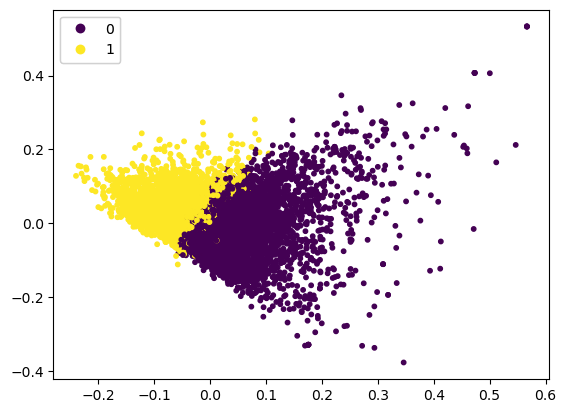

In [9]:
## Question 5

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## The cluster is saved as kMeans2
## To get the features do the following:
# features[kMeans2.cluster_centers_.argsort()]
def PCAPlot(kMeans):
    PCA2dim=PCA(n_components=2).fit_transform(tfidf.toarray())
    fig,ax=plt.subplots()
    scatter=ax.scatter(PCA2dim[:,0],PCA2dim[:,1],c=kMeans.labels_,s=10)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper left", title="")
    ax.add_artist(legend1)

PCAPlot(kMeans2)
top10WordsIndex=kMeans2.cluster_centers_.argsort()[:,-10:]
print(features[top10WordsIndex])

# Question 6

In [10]:
## Question 6

import gensim.downloader as api
import numpy as np

modelGlove=api.load('glove-twitter-25')

TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.5525698179589782
WORD: doctor //TFIDF SCORE: 0.3251472052470261
WORD: time //TFIDF SCORE: 0.20448400010088189
WORD: would //TFIDF SCORE: 0.18426511888672864
WORD: staff //TFIDF SCORE: 0.16469631981135066
WORD: office //TFIDF SCORE: 0.13749900584218128
WORD: great //TFIDF SCORE: 0.13074611178837287
WORD: quot //TFIDF SCORE: 0.12111428254855972
WORD: recommend //TFIDF SCORE: 0.10845758131607795


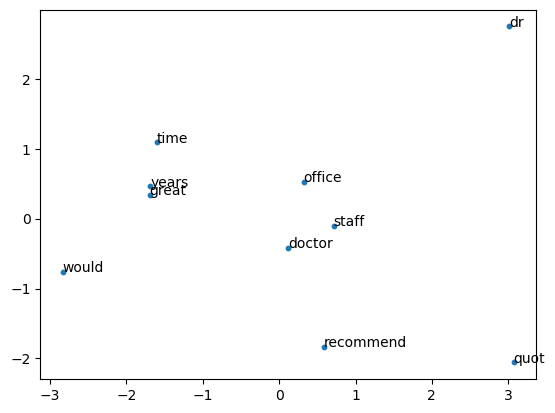

In [14]:
## Question 6 Continued

top10Words=[]
for word in sortedFeatures[:10]:
    top10Words.append(word[0])

# Used to check TFIDF Scores are consistent with features given   
topTFIDF(sortedFeatures)


def visualization(topWords):
    top10Emb=[modelGlove[word] for word in topWords]
    #print(top10Emb)
    emb2D=PCA(n_components=2).fit_transform(np.array(top10Emb))
    fig, ax = plt.subplots()
    plt.scatter(emb2D[:, 0], emb2D[:, 1], s=10)
    for i, w in enumerate(topWords):
        ax.text(emb2D[i, 0], emb2D[i, 1], w)

visualization(top10Words)

# Question 7

In [18]:
## Question 7

## split into positive and negative reviews
positiveReviews=drReview[drReview['rating']==1]
negativeReviews=drReview[drReview['rating']==-1]

## PROCESS THE DATA FOR TFIDF VECTORIZING
stringOfReviewsPositive=' '.join(positiveReviews['review-text-cleaned'])
stringOfReviewsNegative=' '.join(negativeReviews['review-text-cleaned'])

positiveWords=stringOfReviewsPositive.split()
negativeWords=stringOfReviewsNegative.split()

wordsFrequencyPositive=Counter(positiveWords)
wordsFrequencyNegative=Counter(negativeWords)

sortedWordsPositive=sorted(wordsFrequencyPositive.items(),key=lambda x: x[1],reverse=True)
sortedWordsNegative=sorted(wordsFrequencyNegative.items(),key=lambda x: x[1],reverse=True)

## PERFORM TFIDF VECTORIZING FOR POSITIVE REVIEWS
TFIDFVectorPositive=TfidfVectorizer()
tfidfPositive=TFIDFVectorPositive.fit_transform([stringOfReviewsPositive])
featuresPositive=TFIDFVectorPositive.get_feature_names_out()
scoresPositive=tfidfPositive.toarray()[0]
zippedFeaturesPositive=list(zip(featuresPositive,scoresPositive))
sortedFeaturesPositive=sorted(zippedFeaturesPositive,key=lambda x: x[1],reverse=True)

## PERFORM TFIDF VECTORIZING FOR NEGATIVE REVIEWS
TFIDFVectorNegative=TfidfVectorizer()
tfidfNegative=TFIDFVectorNegative.fit_transform([stringOfReviewsNegative])
featuresNegative=TFIDFVectorNegative.get_feature_names_out()
scoresNegative=tfidfNegative.toarray()[0]
zippedFeaturesNegative=list(zip(featuresNegative,scoresNegative))
sortedFeaturesNegative=sorted(zippedFeaturesNegative,key=lambda x: x[1],reverse=True)


print("---POSITIVE REVIEWS---")
#topWords(sortedWordsPositive)
topTFIDF(sortedFeaturesPositive)

print("\n---NEGATIVE REVIEWS---")
#topWords(sortedWordsNegative)
topTFIDF(sortedFeaturesNegative)


---POSITIVE REVIEWS---
TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.6029023697533492
WORD: doctor //TFIDF SCORE: 0.2998877545365833
WORD: time //TFIDF SCORE: 0.206081934131105
WORD: staff //TFIDF SCORE: 0.17254089950937876
WORD: great //TFIDF SCORE: 0.17055934245042584
WORD: would //TFIDF SCORE: 0.15454327117576955
WORD: best //TFIDF SCORE: 0.1283467232679606
WORD: always //TFIDF SCORE: 0.12443814741773233
WORD: recommend //TFIDF SCORE: 0.12127492789243133

---NEGATIVE REVIEWS---
TOP 10 TFIDF SCORES:
WORD: dr //TFIDF SCORE: 0.3594478036224674
WORD: doctor //TFIDF SCORE: 0.3393702336345992
WORD: quot //TFIDF SCORE: 0.23987189628965744
WORD: would //TFIDF SCORE: 0.22822351707728666
WORD: time //TFIDF SCORE: 0.1726925165412208
WORD: office //TFIDF SCORE: 0.1691344661636239
WORD: told //TFIDF SCORE: 0.15968868956595594
WORD: never //TFIDF SCORE: 0.15646950112908256
WORD: get //TFIDF SCORE: 0.1257601377510141


---POSITIVE REVIEWS---


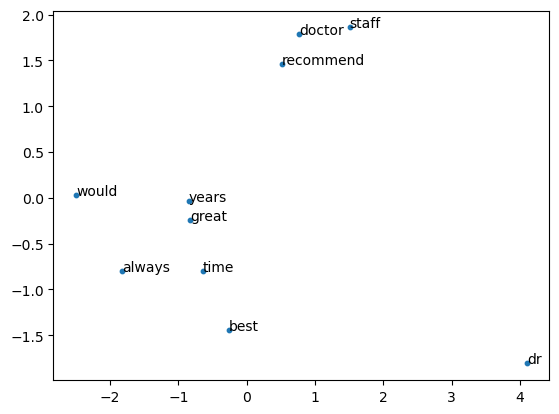

In [19]:
## Question 7 Continued

print("---POSITIVE REVIEWS---")
top10WordsPositive=[]
for word in sortedFeaturesPositive[:10]:
    top10WordsPositive.append(word[0])
visualization(top10WordsPositive)


---NEGATIVE REVIEWS---


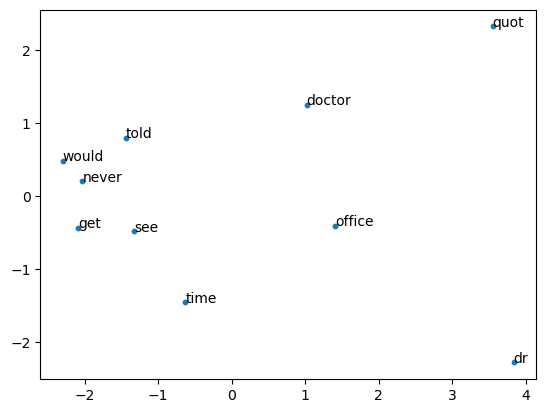

In [20]:
## Question 7 Continued

print("---NEGATIVE REVIEWS---")
top10WordsNegative=[]
for word in sortedFeaturesNegative[:10]:
    top10WordsNegative.append(word[0])
visualization(top10WordsNegative)

# Question 8

In [72]:
## Question 8

import warnings
from sklearn.model_selection import GroupShuffleSplit

warnings.filterwarnings('ignore')

splitter=GroupShuffleSplit(test_size=0.3,n_splits=2,random_state=42)
splitData=splitter.split(drReview,groups=drReview['dr-id-adjusted'])
train,temp=next(splitData)

trainSet=drReview.iloc[train]
tempSet=drReview.iloc[temp]

splitter=GroupShuffleSplit(test_size=0.33,n_splits=2,random_state=42)
splitData=splitter.split(tempSet,groups=tempSet['dr-id-adjusted'])
validation,test=next(splitData)

validationSet=tempSet.iloc[validation]
testSet=tempSet.iloc[test]

## check that the split was done correctly

trainIDs=set(trainSet['dr-id-adjusted'].unique())
validationIDs=set(validationSet['dr-id-adjusted'].unique())
testIDs=set(testSet['review-text-cleaned'].unique())

assert len(trainIDs.intersection(validationIDs))==0
assert len(validationIDs.intersection(testIDs))==0
assert len(testIDs.intersection(trainIDs))==0

print('Number of Reviews in Full Document:',len(drReview))
print('Number of Reviews in Train Set:',len(trainSet))
print('Number of Reviews in Validation Set:',len(validationSet))
print('Number of Reviews in Test Set:',len(testSet))


print('PASSED ASSERTION CHECKS')

Number of Reviews in Full Document: 54017
Number of Reviews in Train Set: 37737
Number of Reviews in Validation Set: 10799
Number of Reviews in Test Set: 5481
PASSED ASSERTION CHECKS
